# Establishing a benchmark

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df_train = pd.read_csv('./datasets/train_clean.csv')
df_test = pd.read_csv('./datasets/test_clean.csv')

**Lot Frontage** : Could be linear  
**Lot Area** : Appears to be linear  
**Year Built** : Seems to start more linear but then the graph curves up more exponentially at the end  
**Year Remodel** : Could be linear or more exponential at the end  
**Basement Finish SF** : Seems to be exponential, possibly linear. Will run tests.  
**Basement Finish SF 2** : Seems to be linear. Will run tests.   
**Total Basement SF** : Looks to be exponential  
**1st Floor SF** : Possibly linear, will run tests.    
**2nd Flr SF** : Possibly linear, will run tests.  
**Garage Living Area** : Looks exponential  
**Garage Year Built** : Looks exponential  
**Garage Area** : Could be linear  
**Wood Deck** : Could be exponential  
**Enclosed Porch** : Looks linear   
**Overall Qual** : Could be exponential

In [3]:
corr = df_train.corr()
high_corr = corr[abs(corr['SalePrice']) > 0.3]
high_corr.drop(columns = ['SalePrice', 'Id', 'Pool Area', 'Misc Val'], inplace = True)

C:\Users\kendr\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [4]:
high_corr.columns.sort_values()

df_train['BsmtFin SF 1 **2'] = df_train['BsmtFin SF 1'] **2

df_train['Total Bsmt SF **2'] = df_train['Total Bsmt SF'] **2

df_train['Gr Liv Area **2'] = df_train['Gr Liv Area'] **2

df_train['Garage Yr Blt **2'] = df_train['Garage Yr Blt'] **2

df_train['Overall Qual **2'] = df_train['Overall Qual'] **2

In [5]:

df_test['BsmtFin SF 1 **2'] = df_train['BsmtFin SF 1'] **2

df_test['Total Bsmt SF **2'] = df_train['Total Bsmt SF'] **2

df_test['Gr Liv Area **2'] = df_train['Gr Liv Area'] **2

df_test['Garage Yr Blt **2'] = df_train['Garage Yr Blt'] **2

df_test['Overall Qual **2'] = df_train['Overall Qual'] **2

In [6]:
feature_list = [i for i in high_corr.columns]

In [7]:
for col in df_train.columns:
    if '**' in col:
        feature_list.append(col)

In [8]:
feature_list;

In [9]:
X = df_train[feature_list]
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 21)

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.900516423717245, 0.8697716588608976)

In [13]:
cross_val_score(lr, X_train, y_train, cv=5)

array([0.90625598, 0.88262192, 0.02824728, 0.90701577, 0.85515358])

### Comments on this Linear Regression Score:

The bias is very high and the R2 score from train to test looks pretty good. Only a dropoff from 0.9 to 0.86. **However,** looking at the cross val score, ouch that variance really is apparent. Scores of 0.90, 0.88, 0.02, 0.90 & 0.86 should be more consistent across the board.

I will go through the set to look for outliers to see if that fixes the issue.

In [14]:
df_train.columns.sort_values()

Index(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Alley', 'Bedroom AbvGr',
       'Bldg Type', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Bsmt Qual', 'Bsmt Unf SF', 'BsmtFin SF 1',
       'BsmtFin SF 1 **2', 'BsmtFin SF 2', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Central Air', 'Condition 1', 'Condition 2', 'Electrical',
       'Enclosed Porch', 'Exter Cond', 'Exter Qual', 'Exterior 1st',
       'Exterior 2nd', 'Fence', 'Fireplace Qu', 'Fireplaces', 'Foundation',
       'Full Bath', 'Functional', 'Garage Area', 'Garage Cars', 'Garage Cond',
       'Garage Finish', 'Garage Qual', 'Garage Type', 'Garage Yr Blt',
       'Garage Yr Blt **2', 'Gr Liv Area', 'Gr Liv Area **2', 'Half Bath',
       'Heating', 'Heating QC', 'House Style', 'Id', 'Kitchen AbvGr',
       'Kitchen Qual', 'Land Contour', 'Land Slope', 'Lot Area', 'Lot Config',
       'Lot Frontage', 'Lot Shape', 'Low Qual Fin SF', 'MS SubClass',
       'MS Zoning', 'Mas Vnr Area', 'Mas Vnr Type', 'M

Text(0, 0.5, 'Sale Price\n')

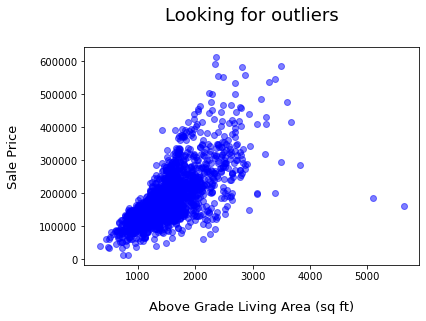

In [15]:
#inspired by https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

plt.scatter(df_train['Gr Liv Area'], df_train['SalePrice'], color = "blue", alpha = 0.5)
plt.title("Looking for outliers\n", fontsize = 18)
plt.xlabel("\nAbove Grade Living Area (sq ft)", fontsize = 13)
plt.ylabel("Sale Price\n", fontsize = 13)


It looks like there are a couple outliers in the set with over 5000 sq ft that sold for right around or a little under \\$200,000. I will drop those from the training data.

In [16]:
df_train = df_train[df_train['Gr Liv Area'] < 5000]

Text(0, 0.5, 'Sale Price\n')

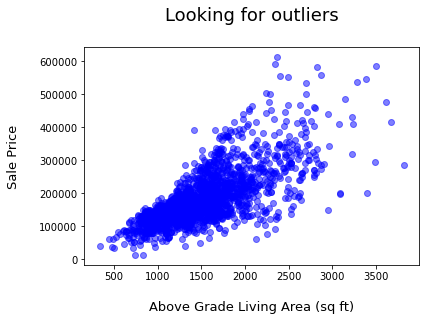

In [17]:
plt.scatter(df_train['Gr Liv Area'], df_train['SalePrice'], color = "blue", alpha = 0.5)
plt.title("Looking for outliers\n", fontsize = 18)
plt.xlabel("\nAbove Grade Living Area (sq ft)", fontsize = 13)
plt.ylabel("Sale Price\n", fontsize = 13)


Outliers are removed. Now let's see if that affected the variance issue from before.

In [18]:
X = df_train[feature_list]
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 21)

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [19]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9105348428540365, 0.9259742740603587)

In [20]:
cross_val_score(lr, X_train, y_train, cv=5)

array([0.90035663, 0.89905159, 0.90675215, 0.90052206, 0.8891976 ])

In [ ]:
predictions = lr.predict(X_test)
np.sqrt(mean_squared_error(y_test, predictions))

### Issue seems to be fixed.

The model went from cross val scores of \[0.90, 0.88, 0.02, 0.90 & 0.86] to \[0.90, 0.899, 0.90, 0.90, 0.89].

## Extracting coefficients to see which features are contributing the most

In [21]:
coef_dict = dict(zip(X_train.columns, lr.coef_))

In [22]:
coef_dict;

For each feature, every increase of 1 unit of the feature, we could expect the Sale Price to move up by it's respective coefficient in dollars. Because there are many features that are not contributing much to the overall Sales Price, I will filter out the features that contribute less than a //$100 move per increase in feature unit.

In [23]:
X_coefs = [i for i in coef_dict if abs(coef_dict[i]) > 100]

In [24]:
feature_list_coefs = []
for key in X_coefs:
    feature_list_coefs.append(key)

In [25]:
feature_list_coefs

['Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Finish',
 'Garage Cars',
 'Mo Sold',
 'Yr Sold',
 'Overall Qual **2']

In [26]:
X = df_train[feature_list_coefs]
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 21)

lr = LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8417927132982431, 0.840170680480927)

In [29]:
cross_val_score(lr, X_train, y_train, cv=5)

array([0.84533937, 0.81625135, 0.83875736, 0.83891641, 0.83009989])

In [30]:
predictions = lr.predict(X_test)

In [31]:
np.sqrt(mean_squared_error(y_test, predictions))

31561.278892513423

## Let's cut it down even more

In [32]:
X_coefs = [i for i in coef_dict if abs(coef_dict[i]) > 1000]
feature_list_coefs = []
for key in X_coefs:
    feature_list_coefs.append(key)

In [33]:
X = df_train[feature_list_coefs]
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 21)

lr = LinearRegression()

In [34]:
lr.fit(X_train,y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8260516906085296, 0.8201096017670707)

In [35]:
cross_val_score(lr, X_train, y_train, cv=5)

array([0.82776865, 0.80489432, 0.8345306 , 0.82112992, 0.81087225])

In [36]:
predictions = lr.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test, predictions))

33483.4623142055

Going from features with a coefficient that change the value over \\$1000 decreases the accuracy from being about \\$33500 off to being about \\$35630 off.

### Kaggle Submissions

In [38]:
X_kaggle = df_test[feature_list_coefs]

In [39]:
X_kaggle = df_test[feature_list_coefs]
kaggle_predictions = lr.predict(X_kaggle)
kaggle_submission = pd.DataFrame()

kaggle_submission['Id'] = df_test['Id']
kaggle_submission['SalePrice'] = kaggle_predictions

kaggle_submission.head()
kaggle_submission.shape, df_test.shape

((878, 2), (878, 85))

In [40]:
kaggle_submission.to_csv('./kaggle/kaggle_submission_04.csv', index=False)

### Trying out just categories with Quality 

In [41]:
df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [42]:
qual_list = [i for i in df_train.columns.values if 'Qual' in i]

In [43]:
X_qual = df_train[qual_list]
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X_qual,y, random_state= 21)

lr = LinearRegression()

lr.fit(X_train,y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

ValueError: could not convert string to float: 'TA'